# Allen Institute
## 05-4_visualization
---
### Before you start
- run codes in `05-3_m1_10x_annot.Rmd`

In [1]:
import glob
from typing import Dict, List, NamedTuple, Union

import matplotlib.pyplot as plt
import numpy as np
import pyreadr as pr
import pandas as pd
import seaborn as sns

In [2]:
class Config(NamedTuple):
    data: pd.core.frame.DataFrame = pd.read_pickle("../../data/m1_10x_viz/umap.pkl")
    labels: pd.core.frame.DataFrame = pd.read_csv(
        "../../data/m1_10x_annot/m1_10x_clusters.csv", 
        index_col=0
    ).sort_values("cluster_id")
    save_dir: str = "../../out/m1_10x/05_seurat_annot"
    fig_kwarg: Dict[str, Union[str, int, float]] = {
        'facecolor': 'white',
        'dpi': 300,
        'bbox_inches': 'tight',
        'pad_inches': 0.05
    }
    save_file: bool = False
    
conf = Config(save_file=True)

In [3]:
sample_id = "resampled m1_10x"

In [4]:
data = conf.data.loc[conf.labels.index, :]

In [5]:
center = data.assign(label=conf.labels.cluster_id).groupby("label").median()

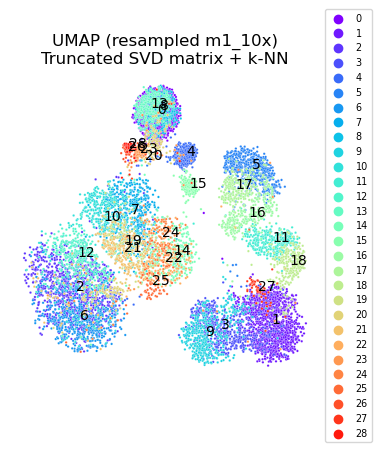

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))

hue = conf.labels.cluster_id

sns.scatterplot(
    data=data, x="UMAP1", y="UMAP2", hue=hue,
    s=3, 
    palette=[plt.cm.rainbow(i/len(hue.unique())) for i in range(len(hue.unique()))]
)

for i, v in enumerate(center.index):
    ax.annotate(int(v), center.iloc[i, :], center.iloc[i, :])

ax.set(title=f"UMAP ({sample_id})\nTruncated SVD matrix + k-NN")
ax.legend(bbox_to_anchor=(1, .5), loc="center left", fontsize="x-small");
ax.axis("off");

if conf.save_file:
    plt.savefig(f"{conf.save_dir}/{sample_id}_umap.png", **conf.fig_kwarg)